/Users/robin/DEV/fuzzy-tutorial/.env/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


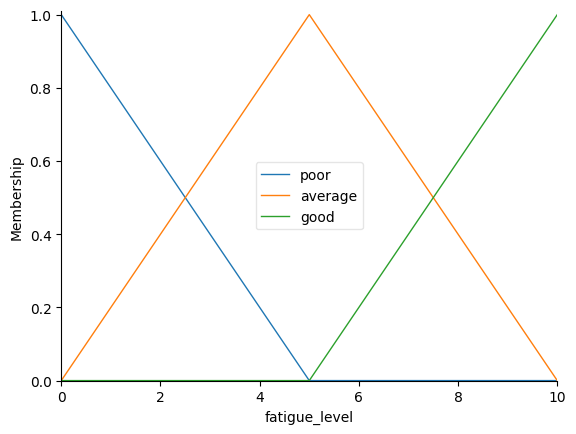

In [16]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

fatigue_level = ctrl.Antecedent(np.arange(0, 11, 1), 'fatigue_level')
sleep_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'sleep_quality')
required_sleep_time = ctrl.Consequent(np.arange(0, 13, 1), 'required_sleep')

fatigue_level.automf(3)
sleep_quality.automf(3)

# fatigue_level['average'].view()
# sleep_quality['average'].view()

required_sleep_time['low'] = fuzz.trimf(required_sleep_time.universe, [0, 0, 4])
required_sleep_time['medium'] = fuzz.trimf(required_sleep_time.universe, [0, 6, 12])
required_sleep_time['high'] = fuzz.trimf(required_sleep_time.universe, [8, 12, 12])

fatigue_level.view()



(<Figure size 640x480 with 1 Axes>, <Axes: >)

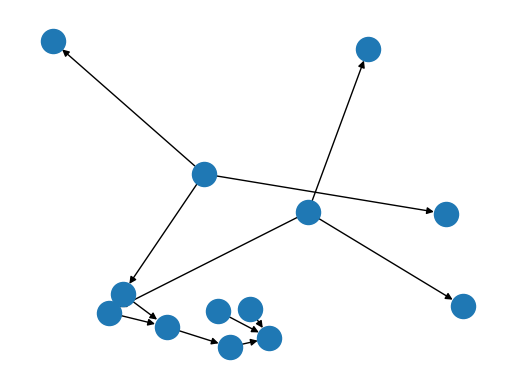

In [48]:
rule1 = ctrl.Rule(fatigue_level['poor'] | sleep_quality['good'], required_sleep_time['low'])
rule2 = ctrl.Rule(fatigue_level['good'] | sleep_quality['poor'], required_sleep_time['high'])
rule3 = ctrl.Rule(fatigue_level['average'] | sleep_quality['average'], required_sleep_time['medium'])



rule1.view()

In [49]:
sleep_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
sleep_time = ctrl.ControlSystemSimulation(sleep_ctrl)

5.599999999999999


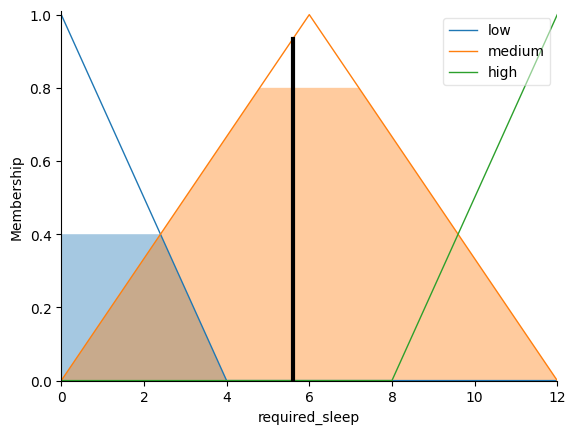

In [47]:
sleep_time.input['fatigue_level'] = 3
sleep_time.input['sleep_quality'] = 6

sleep_time.compute()

print(sleep_time.output['required_sleep'])
required_sleep_time.view(sim=sleep_time)